In [1]:
# Andrew Wong
# New York Institute of Technology
# CSCI 657 Intro to Data Mining

import csv
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
fullValueNames = {}
fullValueNames['classes'] = {'e':'edible','p':'poisonous'}
fullValueNames['cap-shape'] = {'b':'bell','c': 'conical','x':'convex','f':'flat','k':'knobbed','s':'sunken'}
fullValueNames['cap-surface'] = {'f':'fibrous','g':'grooves','y':'scaly','s':'smooth'}
fullValueNames['cap-color'] = {'n':'brown','b':'buff','c':'cinnamon','g':'gray','r':'green','p':'pink','u':'purple','e':'red','w':'white','y':'yellow'}
fullValueNames['bruises'] = {'t':'bruises','f':'no'}
fullValueNames['odor'] = {'a':'almond','l':'anise','c':'creosote','y':'fishy','f':'foul','m':'musty','n':'none','p':'pungent','s':'spicy'}
fullValueNames['gill-attachment'] = {'a':'attached','d':'descending','f':'free','n':'notched'}
fullValueNames['gill-spacing'] = {'c':'close','w':'crowded','d':'distant'}
fullValueNames['gill-size'] = {'b':'broad','n':'narrow'}
fullValueNames['gill-color'] = {'k':'black','n':'brown','b':'buff','h':'chocolate','g':'gray','r':'green','o':'orange','p':'pink','u':'purple','e':'red','w':'white','y':'yellow'}
fullValueNames['stalk-shape'] = {'e':'enlarging','t':'tapering'}
fullValueNames['stalk-root'] = {'b':'bulbous','c':'club','u':'cup','e':'equal','z':'rhizomorphs','r':'rooted','?':'missing'}
fullValueNames['stalk-surface-above-ring'] = {'f':'fibrous','y':'scaly','k':'silky','s':'smooth'}
fullValueNames['stalk-surface-below-ring'] = {'f':'fibrous','y':'scaly','k':'silky','s':'smooth'}
fullValueNames['stalk-color-above-ring'] = {'n':'brown','b':'buff','c':'cinnamon','g':'gray','o':'orange','p':'pink','e':'red','w':'white','y':'yellow'}
fullValueNames['stalk-color-below-ring'] = {'n':'brown','b':'buff','c':'cinnamon','g':'gray','o':'orange','p':'pink','e':'red','w':'white','y':'yellow'}
fullValueNames['veil-type'] = {'p':'partial','u':'universal'}
fullValueNames['veil-color'] = {'n':'brown','o':'orange','w':'white','y':'yellow'}
fullValueNames['ring-number'] = {'n':0,'o':1,'t':2}
fullValueNames['ring-type'] = {'c':'cobwebby','e':'evanescent','f':'flaring','l':'large','n':'none','p':'pendant','s':'sheathing','z':'zone'}
fullValueNames['spore-print-color'] = {'k':'black','n':'brown','b':'buff','h':'chocolate','r':'green','o':'orange','u':'purple','w':'white','y':'yellow'}
fullValueNames['population'] = {'a':'abundant','c':'clustered','n':'numerous','s':'scattered','v':'several','y':'solitary'}
fullValueNames['habitat'] = {'g':'grasses','l':'leaves','m':'meadows','p':'paths','u':'urban','w':'waste','d':'woods'}

In [3]:
def renameValue(key, val):
    return fullValueNames[key][val]

In [4]:
rows = []
X = []
y = []
with open("mushrooms.csv", 'r', encoding="utf8") as f:
    reader = csv.DictReader(f)
    for row in reader:
        rows.append(row)
        X.append([fullValueNames[key][val] for key, val in row.items() if key != 'class'])
        if (row['class'] == 'p'):
            y.append(0)
        else:
            y.append(1)

df = pd.DataFrame.from_dict(rows, orient='columns')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [5]:
df_desc = df.describe().T[['top', 'freq', 'count']]
df_desc['percentage'] = df_desc['freq'] / df_desc['count']
df_desc

,top,freq,count,percentage
class,e,4208,8124,0.517971
cap-shape,x,3656,8124,0.450025
cap-surface,y,3244,8124,0.399311
cap-color,n,2284,8124,0.281142
bruises,f,4748,8124,0.584441
odor,n,3528,8124,0.434269
gill-attachment,f,7914,8124,0.974151
gill-spacing,c,6812,8124,0.838503
gill-size,b,5612,8124,0.690793
gill-color,b,1728,8124,0.212703


In [6]:
enc = OneHotEncoder()
X = enc.fit_transform(X).toarray()

In [7]:
cats = enc.get_feature_names_out(list(rows[0].keys())[1:])
cats

array(['cap-shape_bell', 'cap-shape_conical', 'cap-shape_convex',
       'cap-shape_flat', 'cap-shape_knobbed', 'cap-shape_sunken',
       'cap-surface_fibrous', 'cap-surface_grooves', 'cap-surface_scaly',
       'cap-surface_smooth', 'cap-color_brown', 'cap-color_buff',
       'cap-color_cinnamon', 'cap-color_gray', 'cap-color_green',
       'cap-color_pink', 'cap-color_purple', 'cap-color_red',
       'cap-color_white', 'cap-color_yellow', 'bruises_bruises',
       'bruises_no', 'odor_almond', 'odor_anise', 'odor_creosote',
       'odor_fishy', 'odor_foul', 'odor_musty', 'odor_none',
       'odor_pungent', 'odor_spicy', 'gill-attachment_attached',
       'gill-attachment_free', 'gill-spacing_close',
       'gill-spacing_crowded', 'gill-size_broad', 'gill-size_narrow',
       'gill-color_black', 'gill-color_brown', 'gill-color_buff',
       'gill-color_chocolate', 'gill-color_gray', 'gill-color_green',
       'gill-color_orange', 'gill-color_pink', 'gill-color_purple',
       'gill-co

In [8]:
df_enc = pd.DataFrame(X, columns=cats)
df_enc

,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8120,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8121,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8122,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


[Text(643.8461538461538, 951.3000000000001, 'odor_none <= 0.5\ngini = 0.499\nsamples = 8124\nvalue = [3916, 4208]'),
 Text(343.38461538461536, 679.5, 'stalk-root_club <= 0.5\ngini = 0.288\nsamples = 4596\nvalue = [3796, 800]'),
 Text(171.69230769230768, 407.70000000000005, 'stalk-root_rooted <= 0.5\ngini = 0.132\nsamples = 4048\nvalue = [3760, 288]'),
 Text(85.84615384615384, 135.89999999999998, 'gini = 0.049\nsamples = 3856\nvalue = [3760, 96]'),
 Text(257.53846153846155, 135.89999999999998, 'gini = 0.0\nsamples = 192\nvalue = [0, 192]'),
 Text(515.0769230769231, 407.70000000000005, 'spore-print-color_white <= 0.5\ngini = 0.123\nsamples = 548\nvalue = [36, 512]'),
 Text(429.23076923076917, 135.89999999999998, 'gini = 0.0\nsamples = 512\nvalue = [0, 512]'),
 Text(600.9230769230769, 135.89999999999998, 'gini = 0.0\nsamples = 36\nvalue = [36, 0]'),
 Text(944.3076923076923, 679.5, 'spore-print-color_green <= 0.5\ngini = 0.066\nsamples = 3528\nvalue = [120, 3408]'),
 Text(858.4615384615383

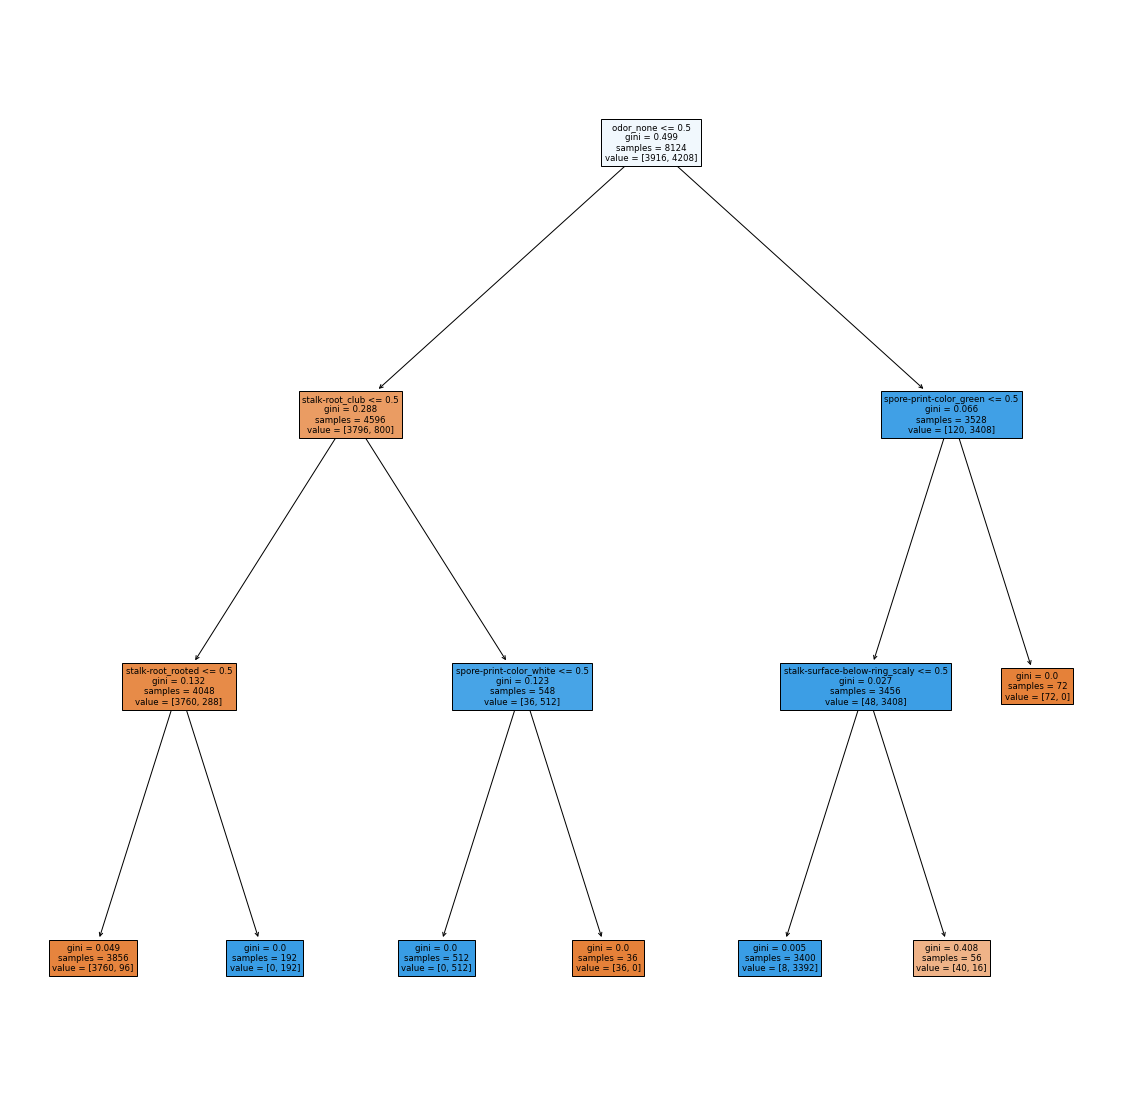

In [9]:
dt1 = tree.DecisionTreeClassifier(max_depth=3, random_state=0)
dt1 = dt1.fit(X, y)
plt.figure(figsize=(20, 20))
tree.plot_tree(dt1, filled=True, feature_names=cats)

In [10]:
featImps1 = {cats[i] : dt1.feature_importances_[i]  for i in range(0, len(dt1.feature_importances_)) if dt1.feature_importances_[i] != 0}
importantFeatures1 = dict(sorted(featImps1.items(), key=lambda item: item[1], reverse=True))
importantFeatures1

{'odor_none': 0.6535124658471181,
 'stalk-root_club': 0.18774758953208676,
 'stalk-root_rooted': 0.09079245888627437,
 'spore-print-color_green': 0.035807973784305606,
 'spore-print-color_white': 0.01756071892968016,
 'stalk-surface-below-ring_scaly': 0.014578793020535132}

In [11]:
tree_rules1 = tree.export_text(dt1, feature_names=list(cats))
print(tree_rules1)

|--- odor_none <= 0.50
|   |--- stalk-root_club <= 0.50
|   |   |--- stalk-root_rooted <= 0.50
|   |   |   |--- class: 0
|   |   |--- stalk-root_rooted >  0.50
|   |   |   |--- class: 1
|   |--- stalk-root_club >  0.50
|   |   |--- spore-print-color_white <= 0.50
|   |   |   |--- class: 1
|   |   |--- spore-print-color_white >  0.50
|   |   |   |--- class: 0
|--- odor_none >  0.50
|   |--- spore-print-color_green <= 0.50
|   |   |--- stalk-surface-below-ring_scaly <= 0.50
|   |   |   |--- class: 1
|   |   |--- stalk-surface-below-ring_scaly >  0.50
|   |   |   |--- class: 0
|   |--- spore-print-color_green >  0.50
|   |   |--- class: 0



In [12]:
rule_supps1 = []
rule_confs1 = []
# Rule 1: (odor != none) & (stalk-root != club) & (stalk-root != rooted) -> (class: poisonous)
covered = df[(df['odor'] != 'n') & (df['stalk-root'] != 'c') & (df['stalk-root'] != 'r')]
correct = covered[covered['class'] == 'p']
print(len(correct), len(covered))
rule_supps1.append(len(covered) / len(df))
rule_confs1.append(len(correct) / len(covered))


# Rule 2: (odor != none) & (stalk-root != club) & (stalk-root == rooted) -> (class: edible)
covered = df[(df['odor'] != 'n') & (df['stalk-root'] != 'c') & (df['stalk-root'] == 'r')]
correct = covered[covered['class'] == 'e']
print(len(correct), len(covered))
rule_supps1.append(len(covered) / len(df))
rule_confs1.append(len(correct) / len(covered))

# Rule 3: (odor != none) & (stalk-root == club) & (spore-print-color != white) -> (class: edible)
covered = df[(df['odor'] != 'n') & (df['stalk-root'] == 'c') & (df['spore-print-color'] != 'w')]
correct = covered[covered['class'] == 'e']
print(len(correct), len(covered))
rule_supps1.append(len(covered) / len(df))
rule_confs1.append(len(correct) / len(covered))

# Rule 4: (odor != none) & (stalk-root == club) & (spore-print-color == white) -> (class: poisonous)
covered = df[(df['odor'] != 'n') & (df['stalk-root'] == 'c') & (df['spore-print-color'] == 'w')]
correct = covered[covered['class'] == 'p']
print(len(correct), len(covered))
rule_supps1.append(len(covered) / len(df))
rule_confs1.append(len(correct) / len(covered))

# Rule 5: (odor == none) & (spore-print-color != green) & (stalk-surface-below-ring != scaly) -> (class: edible)
covered = df[(df['odor'] == 'n') & (df['spore-print-color'] != 'r') & (df['stalk-surface-below-ring'] != 'y')]
correct = covered[covered['class'] == 'e']
print(len(correct), len(covered))
rule_supps1.append(len(covered) / len(df))
rule_confs1.append(len(correct) / len(covered))

# Rule 6: (odor == none) & (spore-print-color != green) & (stalk-surface-below-ring == scaly) -> (class: poisonous)
covered = df[(df['odor'] == 'n') & (df['spore-print-color'] != 'r') & (df['stalk-surface-below-ring'] == 'y')]
correct = covered[covered['class'] == 'p']
print(len(correct), len(covered))
rule_supps1.append(len(covered) / len(df))
rule_confs1.append(len(correct) / len(covered))

# Rule 7: (odor == none) & (spore-print-color == green) -> (class: poisonous)
covered = df[(df['odor'] == 'n') & (df['spore-print-color'] == 'r')]
correct = covered[covered['class'] == 'p']
print(len(correct), len(covered))
rule_supps1.append(len(covered) / len(df))
rule_confs1.append(len(correct) / len(covered))

3760 3856
192 192
512 512
36 36
3392 3400
40 56
72 72


In [13]:
def getProb(df_filtered):
    return len(df_filtered) / len(df)

In [14]:
rule_lifts1 = []

num = getProb(df[(df['odor'] != 'n') & (df['stalk-root'] != 'c') & (df['stalk-root'] != 'r')])
den = getProb(df[df['odor'] != 'n']) * getProb(df[df['stalk-root'] != 'c']) * getProb(df[df['stalk-root'] != 'r'])
rule_lifts1.append(num/den)

num = getProb(df[(df['odor'] != 'n') & (df['stalk-root'] != 'c') & (df['stalk-root'] == 'r')])
den = getProb(df[df['odor'] != 'n']) * getProb(df[df['stalk-root'] != 'c']) * getProb(df[df['stalk-root'] == 'r'])
rule_lifts1.append(num/den)

num = getProb(df[(df['odor'] != 'n') & (df['stalk-root'] == 'c') & (df['spore-print-color'] != 'w')])
den = getProb(df[df['odor'] != 'n']) * getProb(df[df['stalk-root'] == 'c']) * getProb(df[df['spore-print-color'] != 'w'])
rule_lifts1.append(num/den)

num = getProb(df[(df['odor'] != 'n') & (df['stalk-root'] == 'c') & (df['spore-print-color'] == 'w')])
den = getProb(df[df['odor'] != 'n']) * getProb(df[df['stalk-root'] == 'c']) * getProb(df[df['spore-print-color'] == 'w'])
rule_lifts1.append(num/den)

num = getProb(df[(df['odor'] == 'n') & (df['spore-print-color'] != 'r') & (df['stalk-surface-below-ring'] != 'y')])
den = getProb(df[df['odor'] == 'n']) * getProb(df[df['spore-print-color'] != 'r']) * getProb(df[df['stalk-surface-below-ring'] != 'y'])
rule_lifts1.append(num/den)

num = getProb(df[(df['odor'] == 'n') & (df['spore-print-color'] != 'r') & (df['stalk-surface-below-ring'] == 'y')])
den = getProb(df[df['odor'] == 'n']) * getProb(df[df['spore-print-color'] != 'r']) * getProb(df[df['stalk-surface-below-ring'] != 'y'])
rule_lifts1.append(num/den)

num = getProb(df[(df['odor'] == 'n') & (df['spore-print-color'] == 'r')])
den = getProb(df[df['odor'] == 'n']) * getProb(df[df['spore-print-color'] == 'r'])
rule_lifts1.append(num/den)

In [15]:
for i in range(0, len(rule_supps1)):
    print(f'Rule {i+1}: (support = {round(rule_supps1[i]*100, 2)}%, confidence = {round(rule_confs1[i], 2)}, lift = {round(rule_lifts1[i], 2)})')

Rule 1: (support = 47.46%, confidence = 0.98, lift = 0.92)
Rule 2: (support = 2.36%, confidence = 1.0, lift = 1.9)
Rule 3: (support = 6.3%, confidence = 1.0, lift = 2.31)
Rule 4: (support = 0.44%, confidence = 1.0, lift = 0.39)
Rule 5: (support = 41.85%, confidence = 1.0, lift = 1.01)
Rule 6: (support = 0.69%, confidence = 0.71, lift = 0.02)
Rule 7: (support = 0.89%, confidence = 1.0, lift = 2.3)


Gini accuracy: 98.52%
Gini precision: 99.81%
Gini recall: 97.34%
Gini specificity: 99.8%


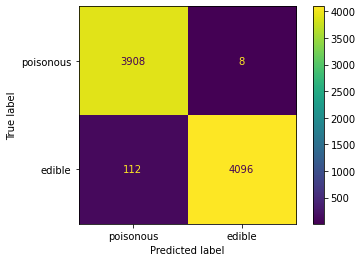

In [16]:
y_pred1 = dt1.predict(X)
acc1 = metrics.accuracy_score(y, y_pred1)
pre1 = metrics.precision_score(y, y_pred1)
rec1 = metrics.recall_score(y, y_pred1)
spe1 = metrics.recall_score(y, y_pred1, pos_label=0)
cm1 = metrics.confusion_matrix(y, y_pred1)

print(f'Gini accuracy: {round(acc1*100, 2)}%')
print(f'Gini precision: {round(pre1*100, 2)}%')
print(f'Gini recall: {round(rec1*100, 2)}%')
print(f'Gini specificity: {round(spe1*100, 2)}%')

disp = metrics.ConfusionMatrixDisplay(cm1, display_labels=['poisonous', 'edible'])
disp.plot()

[Text(558.0, 951.3000000000001, 'odor_none <= 0.5\nentropy = 0.999\nsamples = 8124\nvalue = [3916, 4208]'),
 Text(223.2, 679.5, 'bruises_bruises <= 0.5\nentropy = 0.667\nsamples = 4596\nvalue = [3796, 800]'),
 Text(111.6, 407.70000000000005, 'entropy = 0.0\nsamples = 3252\nvalue = [3252, 0]'),
 Text(334.79999999999995, 407.70000000000005, 'stalk-root_club <= 0.5\nentropy = 0.974\nsamples = 1344\nvalue = [544, 800]'),
 Text(223.2, 135.89999999999998, 'entropy = 0.931\nsamples = 832\nvalue = [544, 288]'),
 Text(446.4, 135.89999999999998, 'entropy = 0.0\nsamples = 512\nvalue = [0, 512]'),
 Text(892.8, 679.5, 'spore-print-color_green <= 0.5\nentropy = 0.214\nsamples = 3528\nvalue = [120, 3408]'),
 Text(781.1999999999999, 407.70000000000005, 'stalk-surface-below-ring_scaly <= 0.5\nentropy = 0.106\nsamples = 3456\nvalue = [48, 3408]'),
 Text(669.5999999999999, 135.89999999999998, 'entropy = 0.024\nsamples = 3400\nvalue = [8, 3392]'),
 Text(892.8, 135.89999999999998, 'entropy = 0.863\nsamples

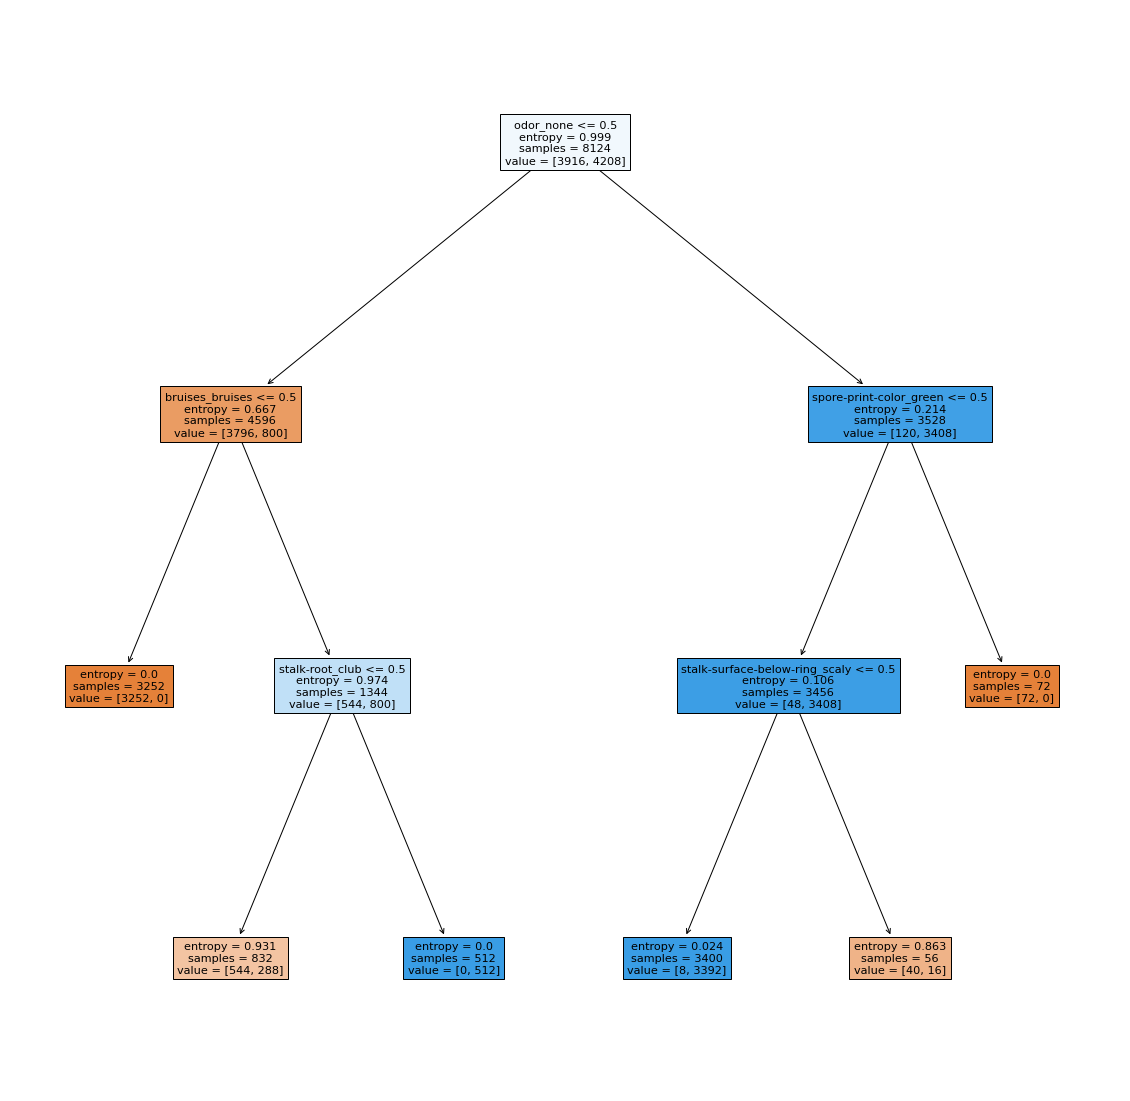

In [17]:
dt2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dt2 = dt2.fit(X, y)
plt.figure(figsize=(20, 20))
tree.plot_tree(dt2, filled=True, feature_names=cats)

In [18]:
featImps2 = {cats[i] : dt2.feature_importances_[i]  for i in range(0, len(dt2.feature_importances_)) if dt2.feature_importances_[i] != 0}
importantFeatures2 = dict(sorted(featImps2.items(), key=lambda item: item[1], reverse=True))
importantFeatures2

{'odor_none': 0.5956070147339111,
 'bruises_bruises': 0.2435432404291484,
 'stalk-root_club': 0.07408869178303829,
 'spore-print-color_green': 0.054149554467275575,
 'stalk-surface-below-ring_scaly': 0.032611498586626625}

In [19]:
tree_rules2 = tree.export_text(dt2, feature_names=list(cats))
print(tree_rules2)

|--- odor_none <= 0.50
|   |--- bruises_bruises <= 0.50
|   |   |--- class: 0
|   |--- bruises_bruises >  0.50
|   |   |--- stalk-root_club <= 0.50
|   |   |   |--- class: 0
|   |   |--- stalk-root_club >  0.50
|   |   |   |--- class: 1
|--- odor_none >  0.50
|   |--- spore-print-color_green <= 0.50
|   |   |--- stalk-surface-below-ring_scaly <= 0.50
|   |   |   |--- class: 1
|   |   |--- stalk-surface-below-ring_scaly >  0.50
|   |   |   |--- class: 0
|   |--- spore-print-color_green >  0.50
|   |   |--- class: 0



In [20]:
rule_supps2 = []
rule_confs2 = []

# Rule 1: (odor != none) & (bruises != bruises) -> (class: poisonous)
covered = df[(df['odor'] != 'n') & (df['bruises'] != 't')]
correct = covered[covered['class'] == 'p']
print(len(correct), len(covered))
rule_supps2.append(len(covered) / len(df))
rule_confs2.append(len(correct) / len(covered))

# Rule 2: (odor != none) & (bruises == bruises) & (stalk-root != club) -> (class: poisonous)
covered = df[(df['odor'] != 'n') & (df['bruises'] == 't') & (df['stalk-root'] != 'c')]
correct = covered[covered['class'] == 'p']
print(len(correct), len(covered))
rule_supps2.append(len(covered) / len(df))
rule_confs2.append(len(correct) / len(covered))

# Rule 3: (odor != none) & (bruises == bruises) & (stalk-root == club) -> (class: edible)
covered = df[(df['odor'] != 'n') & (df['bruises'] == 't') & (df['stalk-root'] == 'c')]
correct = covered[covered['class'] == 'e']
print(len(correct), len(covered))
rule_supps2.append(len(covered) / len(df))
rule_confs2.append(len(correct) / len(covered))

# Rule 4: (odor == none) & (spore-print-color != green) & (stalk-surface-below-ring != scaly) -> (class: edible)
covered = df[(df['odor'] == 'n') & (df['spore-print-color'] != 'r') & (df['stalk-surface-below-ring'] != 'y')]
correct = covered[covered['class'] == 'e']
print(len(correct), len(covered))
rule_supps2.append(len(covered) / len(df))
rule_confs2.append(len(correct) / len(covered))

# Rule 5: (odor == none) & (spore-print-color != green) & (stalk-surface-below-ring == scaly) -> (class: poisonous)
covered = df[(df['odor'] == 'n') & (df['spore-print-color'] != 'r') & (df['stalk-surface-below-ring'] == 'y')]
correct = covered[covered['class'] == 'p']
print(len(correct), len(covered))
rule_supps2.append(len(covered) / len(df))
rule_confs2.append(len(correct) / len(covered))

# Rule 6: (odor == none) & (spore-print-color == green) -> (class: poisonous)
covered = df[(df['odor'] == 'n') & (df['spore-print-color'] == 'r')]
correct = covered[covered['class'] == 'p']
print(len(correct), len(covered))
rule_supps2.append(len(covered) / len(df))
rule_confs2.append(len(correct) / len(covered))

3252 3252
544 832
512 512
3392 3400
40 56
72 72


In [21]:
rule_lifts2 = []

num = getProb(df[(df['odor'] != 'n') & (df['bruises'] != 't')])
den = getProb(df[df['odor'] != 'n']) * getProb(df[df['bruises'] != 't'])
rule_lifts2.append(num/den)

num = getProb(df[(df['odor'] != 'n') & (df['bruises'] == 't') & (df['stalk-root'] != 'c')])
den = getProb(df[df['odor'] != 'n']) * getProb(df[df['bruises'] != 't']) * getProb(df[df['stalk-root'] != 'c'])
rule_lifts2.append(num/den)

num = getProb(df[(df['odor'] != 'n') & (df['bruises'] == 't') & (df['stalk-root'] == 'c')])
den = getProb(df[df['odor'] != 'n']) * getProb(df[df['bruises'] != 't']) * getProb(df[df['stalk-root'] == 'c'])
rule_lifts2.append(num/den)

num = getProb(df[(df['odor'] == 'n') & (df['spore-print-color'] != 'r') & (df['stalk-surface-below-ring'] != 'y')])
den = getProb(df[df['odor'] == 'n']) * getProb(df[df['spore-print-color'] != 'r']) * getProb(df[df['stalk-surface-below-ring'] != 'y'])
rule_lifts2.append(num/den)

num = getProb(df[(df['odor'] == 'n') & (df['spore-print-color'] != 'r') & (df['stalk-surface-below-ring'] == 'y')])
den = getProb(df[df['odor'] == 'n']) * getProb(df[df['spore-print-color'] != 'r']) * getProb(df[df['stalk-surface-below-ring'] == 'y'])
rule_lifts2.append(num/den)

num = getProb(df[(df['odor'] == 'n') & (df['spore-print-color'] == 'r')])
den = getProb(df[df['odor'] == 'n']) * getProb(df[df['spore-print-color'] == 'r'])
rule_lifts2.append(num/den)

In [22]:
for i in range(0, len(rule_supps2)):
    print(f'Rule {i+1}: (support = {round(rule_supps2[i]*100, 2)}%, confidence = {round(rule_confs2[i], 2)}, lift = {round(rule_lifts2[i], 2)})')

Rule 1: (support = 40.03%, confidence = 1.0, lift = 1.21)
Rule 2: (support = 10.24%, confidence = 0.65, lift = 0.33)
Rule 3: (support = 6.3%, confidence = 1.0, lift = 2.79)
Rule 4: (support = 41.85%, confidence = 1.0, lift = 1.01)
Rule 5: (support = 0.69%, confidence = 0.71, lift = 0.46)
Rule 6: (support = 0.89%, confidence = 1.0, lift = 2.3)


Entropy accuracy: 96.16%
Entropy precision: 99.8%
Entropy recall: 92.78%
Entropy specificity: 99.8%


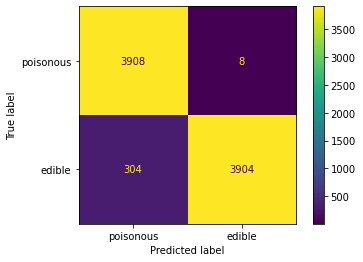

In [23]:
y_pred2 = dt2.predict(X)
acc2 = metrics.accuracy_score(y, y_pred2)
pre2 = metrics.precision_score(y, y_pred2)
rec2 = metrics.recall_score(y, y_pred2)
spe2 = metrics.recall_score(y, y_pred2, pos_label=0)
cm2 = metrics.confusion_matrix(y, y_pred2)

print(f'Entropy accuracy: {round(acc2*100, 2)}%')
print(f'Entropy precision: {round(pre2*100, 2)}%')
print(f'Entropy recall: {round(rec2*100, 2)}%')
print(f'Entropy specificity: {round(spe2*100, 2)}%')

disp2 = metrics.ConfusionMatrixDisplay(cm2, display_labels=['poisonous', 'edible'])
disp2.plot()